You can download the in this notebook from: https://www.kaggle.com/sobhanmoosavi/us-accidents

In [1]:
# Import the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

USacc_df = pd.read_csv('US_Accidents_June20.csv')
NJacc_df = USacc_df[USacc_df['State']=='NJ']
NJacc_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194254,A-194256,MapQuest,201.0,2,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,NaN,NaN,...,False,False,False,False,True,False,Night,Day,Day,Day
194270,A-194272,MapQuest,201.0,2,2016-11-30 17:11:50,2016-11-30 17:56:38,40.944626,-74.100800,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
194271,A-194273,MapQuest,201.0,2,2016-11-30 17:13:28,2016-11-30 18:13:14,40.846260,-74.042770,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
194280,A-194282,MapQuest,241.0,3,2016-11-30 17:29:30,2016-11-30 18:14:16,40.641262,-74.205650,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Day,Day
194299,A-194301,MapQuest,203.0,2,2016-11-30 19:10:49,2016-11-30 20:10:39,40.957714,-73.975098,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Night,Night


#### Extract year, month, day, weekday information from start time and endtime of accident

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Convert Start_Time and End_Time to datetypes
NJacc_df['Start_Time'] = pd.to_datetime(NJacc_df['Start_Time'], errors='coerce')
NJacc_df['End_Time'] = pd.to_datetime(NJacc_df['End_Time'], errors='coerce')

# Extract year, month, day, hour, weekday and time_duration information
NJacc_df['Year']=NJacc_df['Start_Time'].dt.year
NJacc_df['Month']=NJacc_df['Start_Time'].dt.strftime('%b')
NJacc_df['Day']=NJacc_df['Start_Time'].dt.day
NJacc_df['Hour']=NJacc_df['Start_Time'].dt.hour
NJacc_df['Weekday']=NJacc_df['Start_Time'].dt.strftime('%a')

# Extract the amount of time in the unit of minutes for each accident, round to the nearest integer
total_duration='Time_Duration(min)'
NJacc_df[total_duration]=round((NJacc_df['End_Time']-NJacc_df['Start_Time'])/np.timedelta64(1,'m'))

# Check the dataframe
NJacc_df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min)
194254,A-194256,MapQuest,201.0,2,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,NaN,NaN,...,Night,Day,Day,Day,2016,Nov,30,16,Wed,45.0
194270,A-194272,MapQuest,201.0,2,2016-11-30 17:11:50,2016-11-30 17:56:38,40.944626,-74.100800,NaN,NaN,...,Night,Night,Day,Day,2016,Nov,30,17,Wed,45.0
194271,A-194273,MapQuest,201.0,2,2016-11-30 17:13:28,2016-11-30 18:13:14,40.846260,-74.042770,NaN,NaN,...,Night,Night,Day,Day,2016,Nov,30,17,Wed,60.0
194280,A-194282,MapQuest,241.0,3,2016-11-30 17:29:30,2016-11-30 18:14:16,40.641262,-74.205650,NaN,NaN,...,Night,Night,Day,Day,2016,Nov,30,17,Wed,45.0
194299,A-194301,MapQuest,203.0,2,2016-11-30 19:10:49,2016-11-30 20:10:39,40.957714,-73.975098,NaN,NaN,...,Night,Night,Night,Night,2016,Nov,30,19,Wed,60.0


### Severity of accident in NJ?

In [3]:
NJacc_df.Severity.value_counts().sort_values(ascending=False)

2    39160
3    16040
4     3766
1       93
Name: Severity, dtype: int64

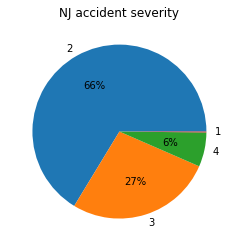

In [4]:
def calc_autopct(pct):
    return ('%1.0f%%' % pct) if pct > 2 else ''

plt.pie(NJacc_df.Severity.value_counts(), labels=NJacc_df.Severity.value_counts().index.tolist(),autopct=calc_autopct)
plt.title('NJ accident severity')
plt.show()

Accident severity is mostly 2 and 3

### Daytime versus Nighttime accidents

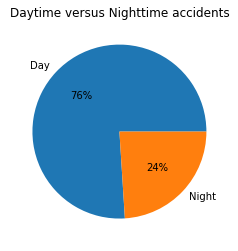

In [5]:
NJ_curr= NJacc_df['Sunrise_Sunset'].value_counts(normalize=True).round(2)
labels = [n if v > 2/100 else '' for n, v in zip(NJ_curr.index, NJ_curr)] 
plt.pie(NJ_curr, labels = labels,autopct=calc_autopct)
plt.title('Daytime versus Nighttime accidents')
plt.show()

most of the accidents occur in the day

### Weekday versus weekend accidents

(0, 13000)

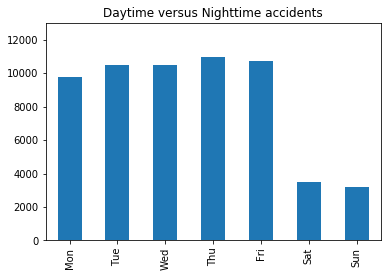

In [6]:
weekdays = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
NJacc_df.groupby('Weekday').count()['ID'].reindex(weekdays).plot(kind='bar')
plt.title('Daytime versus Nighttime accidents')
plt.xlabel('')
plt.ylim(0, 13000)

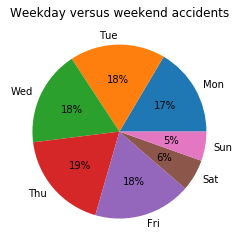

In [7]:
NJ_curr=NJacc_df.groupby('Weekday').count()['ID'].reindex(weekdays)
labels = [n if v > 2/100 else '' for n, v in zip(NJ_curr.index, NJ_curr)] 
plt.pie(NJ_curr, labels = labels,autopct=calc_autopct)
plt.title('Weekday versus weekend accidents')
plt.show()

Most of the accidents occur during weekdays

### Time of most accidents

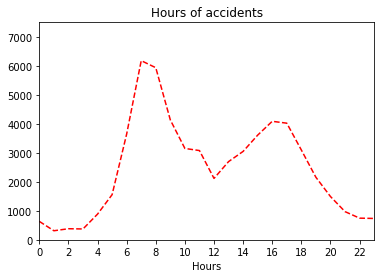

In [8]:
NJ_curr=NJacc_df.groupby('Hour').count()['ID'].reindex(np.arange(24)).plot(linestyle='dashed',color='r')
plt.xlabel('Hours')
plt.ylim(0, 7500)
plt.title('Hours of accidents')
plt.xticks(np.arange(0, 24, step=2))
plt.show()

Most of the accidents happen during 6-8 and 16-18 i.e., office travel time.


### Accidents by county

Let's first take a look of the NJ Map

<img src="new-jersey-county-map.gif" alt="Drawing" style="width: 300px;"/>

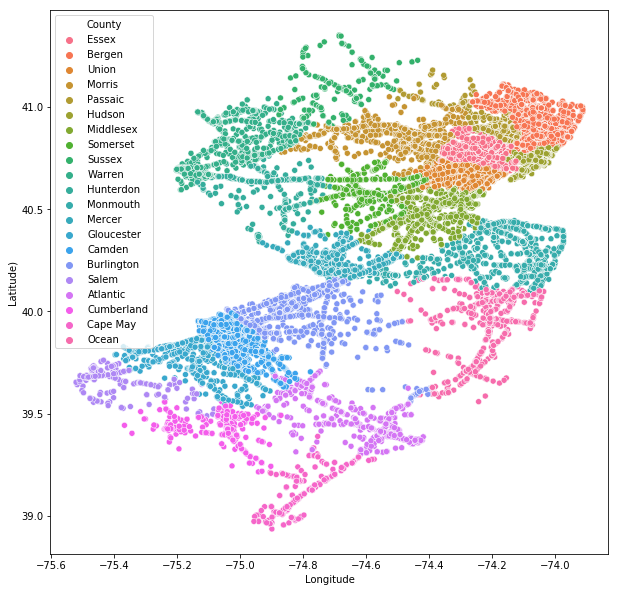

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=NJacc_df, hue='County')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

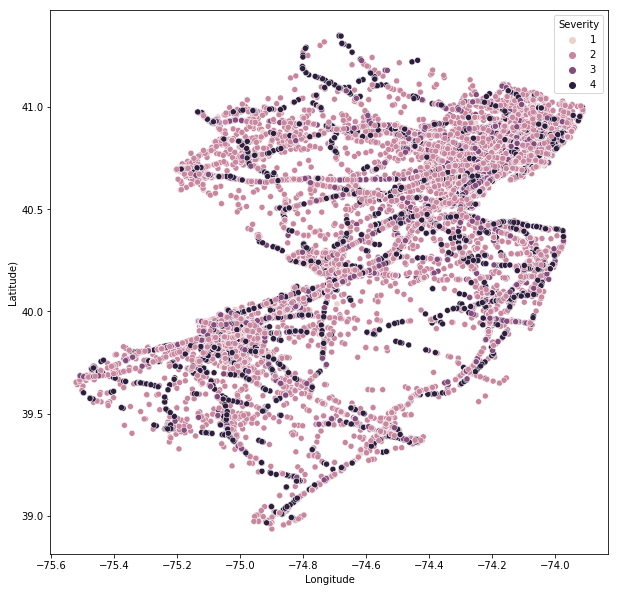

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=NJacc_df, hue='Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

As we can see along some path there is higher chances of sever accidents

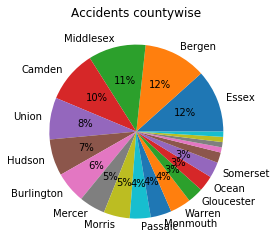

In [11]:
NJ_curr= NJacc_df['County'].value_counts(normalize=True).round(2)
labels = [n if v > 2/100 else '' for n, v in zip(NJ_curr.index, NJ_curr)] 
plt.pie(NJ_curr, labels = labels,autopct=calc_autopct)
plt.title('Accidents countywise')
plt.show()

### Accidents by city

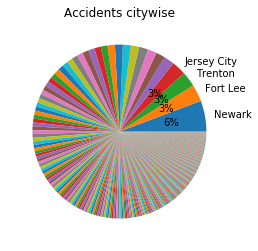

In [12]:
NJ_curr= NJacc_df['City'].value_counts(normalize=True).round(8)
labels = [n if v > 2/100 else '' for n, v in zip(NJ_curr.index, NJ_curr)] 
plt.pie(NJ_curr, labels = labels,autopct=calc_autopct)
plt.title('Accidents citywise')
plt.show()

### Streetside of the accidents

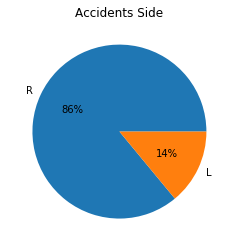

In [13]:
NJ_curr= NJacc_df['Side'].value_counts(normalize=True).round(2)
labels = [n if v > 2/100 else '' for n, v in zip(NJ_curr.index, NJ_curr)] 
plt.pie(NJ_curr, labels = labels,autopct=calc_autopct)
plt.title('Accidents Side')
plt.show()

 Most of the accidents happen on relatively right side of the street

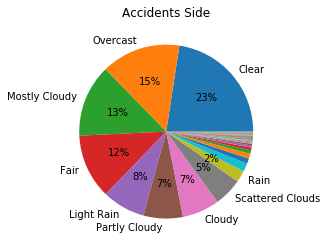

In [14]:
NJ_curr= NJacc_df['Weather_Condition'].value_counts(normalize=True).round(4)
labels = [n if v > 2/100 else '' for n, v in zip(NJ_curr.index, NJ_curr)] 
plt.pie(NJ_curr, labels = labels,autopct=calc_autopct)
plt.title('Accidents Side')
plt.show()

Most of the accident happened on a clear weather day, maybe because most of the day's weather is clear.

## Predict the accident severity with different supervised machine learning algorithms

#### Drop rows with negative time

In [15]:
# Drop the rows with td<0
negtime_outliers=NJacc_df[total_duration]<=0

# Set outliers to NAN
NJacc_df[negtime_outliers] = np.nan

# Drop rows with negative td
NJacc_df.dropna(subset=[total_duration],axis=0,inplace=True)

#### Replace outliers with median values. 

In [16]:
n=3

median = NJacc_df[total_duration].median()
std = NJacc_df[total_duration].std()
outliers = (NJacc_df[total_duration] - median).abs() > std*n

# Set outliers to NAN
NJacc_df[outliers] = np.nan

# Fill NAN with median
NJacc_df[total_duration].fillna(median, inplace=True)

In [17]:
feature_lst=['Source','TMC','Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']

In [18]:
NJacc_feature_df=NJacc_df[feature_lst]
NJacc_feature_df.dropna(subset=NJacc_feature_df.columns[NJacc_feature_df.isnull().mean()!=0], how='any', axis=0, inplace=True)
NJacc_feature_df.shape

(34433, 34)

#### Create dummy variable

what is dummay variable?

In [19]:
s = pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [20]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [21]:
NJacc_dummy = pd.get_dummies(NJacc_feature_df,drop_first=True)

#### Train and test split

In [22]:
from sklearn.model_selection import train_test_split

# Set the target for the prediction
target='Severity'

# set X and y
y = NJacc_dummy[target]
X = NJacc_dummy.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [40]:
y_test.value_counts()

2.0    4631
3.0    2238
4.0      13
1.0       5
Name: Severity, dtype: int64

##### Using KNN algorithm

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a k-NN classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
accuracy=accuracy_score(y_test, y_pred)


print('KNN accuracy_score: {:.3f}.'.format(accuracy))

KNN accuracy_score: 0.631.


In [25]:
from sklearn.metrics import recall_score
recall=recall_score(y_test, y_pred, average='weighted')
print('KNN recall_score: {:.3f}.'.format(recall))

KNN recall_score: 0.631.


Precision attempts to answer the following question:


$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}, \text{ out of all points predicted to be class } 1, \text{ what fraction were actually class } 1.
$$


$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \text{ out of all the actual data points in class } 1 \text{, what fraction did the algorithm correctly predict?}
$$

In [26]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average='weighted')
print('KNN precision_score: {:.3f}.'.format(precision))

KNN precision_score: 0.600.


In [29]:
from sklearn.metrics import multilabel_confusion_matrix
cf_matrix=multilabel_confusion_matrix(y_test, y_pred)
print('KNN cf_matrix: ', cf_matrix)

KNN cf_matrix:  [[[6882    0]
  [   5    0]]

 [[ 634 1622]
  [ 911 3720]]

 [[3732  917]
  [1610  628]]

 [[6874    0]
  [  13    0]]]


##### Using Decision tree algorithm

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
decisiontree = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
decisiontree.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= decisiontree.predict(X_test)

# Evaluate accuracy_entropy
accuracy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('Decision Tree accuracy_score: {:.3f}.'.format(accuracy))

Decision Tree accuracy_score: 0.747.


In [31]:
from sklearn.metrics import recall_score
recall=recall_score(y_test, y_pred, average='weighted')
print('Decision tree recall_score: {:.3f}.'.format(recall))

Decision tree recall_score: 0.747.


In [32]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average='weighted')
print('Decision tree precision_score: {:.3f}.'.format(precision))

Decision tree precision_score: 0.736.


In [33]:
from sklearn.metrics import multilabel_confusion_matrix
cf_matrix=multilabel_confusion_matrix(y_test, y_pred)
print('Decision tree cf_matrix: ', cf_matrix)

Decision tree cf_matrix:  [[[6882    0]
  [   5    0]]

 [[ 924 1332]
  [ 406 4225]]

 [[4239  410]
  [1318  920]]

 [[6874    0]
  [  13    0]]]


##### Using Random forest algorithm

In [35]:
# Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier


clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Get the accuracy score
accuracy=accuracy_score(y_test, y_pred)


# Model Accuracy, how often is the classifier correct?
print("Randon forest algorithm accuracy_score: {:.3f}.".format(accuracy))

Randon forest algorithm accuracy_score: 0.875.


In [36]:
from sklearn.metrics import recall_score
recall=recall_score(y_test, y_pred, average='weighted')
print('Random forest recall_score: {:.3f}.'.format(recall))

Random forest recall_score: 0.875.


In [37]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_pred, average='weighted')
print('Random forest precision_score: {:.3f}.'.format(precision))

Random forest precision_score: 0.871.


In [38]:
from sklearn.metrics import multilabel_confusion_matrix
cf_matrix=multilabel_confusion_matrix(y_test, y_pred)
print('Random forest cf_matrix: ', cf_matrix)

Random forest cf_matrix:  [[[6882    0]
  [   5    0]]

 [[1787  469]
  [ 383 4248]]

 [[4254  395]
  [ 463 1775]]

 [[6874    0]
  [  13    0]]]
